In [1]:
# Task I - Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)
X = pd.read_csv('../data/X.csv')
Y = pd.read_csv('../data/Y.csv')

In [3]:
# 1. Compute the following statistics for each component of X and Y:
# mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.
metrics = pd.merge(X, Y, on='TimeStamp')
metrics.iloc[:,1:].describe(percentiles=[.25, .90])

,all_..idle,X..memused,proc.s,cswch.s,file.nr,sum_intr.s,ldavg.1,tcpsck,pgfree.s,DispFrames
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,9.064981,89.137517,7.683303,54045.874022,2656.333333,19978.040747,75.875772,48.997500,72872.154569,18.818394
std,16.122822,8.183662,8.532606,19497.811540,196.110748,4797.271325,43.862445,15.871155,19504.321175,5.219756
min,0.000000,73.030000,0.000000,11398.000000,2304.000000,10393.000000,11.130000,21.000000,15928.000000,0.000000
25%,0.000000,82.965000,0.000000,31302.000000,2496.000000,16678.000000,28.200000,34.000000,61601.750000,13.390000
50%,0.000000,92.175000,6.000000,63908.000000,2688.000000,18109.000000,75.390000,47.000000,71686.500000,19.120001
90%,38.621000,96.770000,20.000000,72135.100000,2880.000000,28228.400000,127.993000,71.000000,97532.500000,24.610000
max,69.540000,97.840000,48.000000,83880.000000,2976.000000,35536.000000,147.470000,87.000000,145874.000000,30.390000


In [4]:
# 2. Compute the following quantities:

# (a) the number of observations with memory usage larger than 80%;
a = metrics[metrics['X..memused'] > 80].count()['X..memused']
print 'a) Number of observations:', a

# (b) the average number of used TCP sockets for observations
# with more than 18000 interrupts/sec;
b = metrics[metrics['sum_intr.s'] > 18000].mean()['tcpsck']
print 'b) Average number of used TCP sockets: %.2f' % b

# (c) the minimum memory utilization for observations
# with CPU idle time lower than 20%.
c = metrics[metrics['all_..idle'] < 20].min()['X..memused']
print 'c) Minimum memory utilization: %.2f' % c

a) Number of observations: 2875
b) Average number of used TCP sockets: 46.35
c) Minimum memory utilization: 73.03


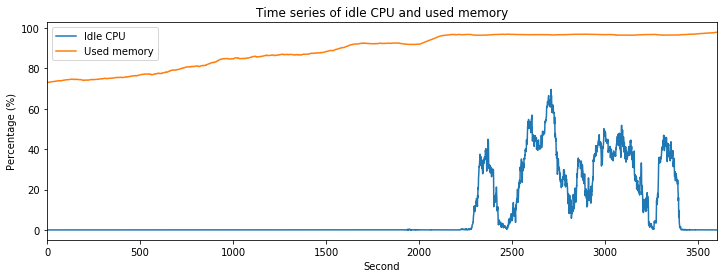

In [5]:
# 3. Produce the following plots:

# (a) Time series of percentage of idle CPU and of used memory
# (both in a single plot);
series = pd.DataFrame(metrics, columns=['all_..idle', 'X..memused']);
ts = series.plot(title = 'Time series of idle CPU and used memory')
ts.legend(['Idle CPU', 'Used memory'])
ts.set_xlabel("Second")
ts.set_ylabel("Percentage (%)")
fig = ts.get_figure()
plt.show()

In [6]:
plt.close(fig)

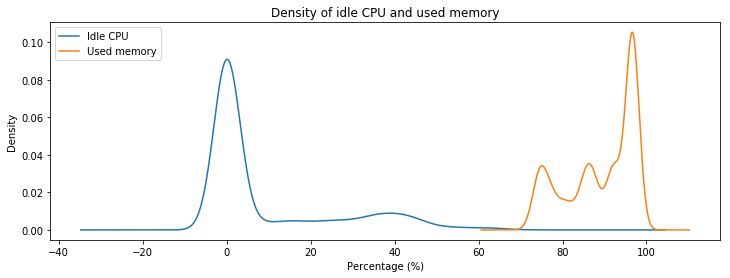

In [7]:
# (b) Density plots, histograms, and box plots of idle CPU and of used memory.
kde = series.plot.kde(title = 'Density of idle CPU and used memory')
kde.legend(['Idle CPU', 'Used memory'])
kde.set_xlabel("Percentage (%)")
fig = kde.get_figure()
plt.show()

In [8]:
plt.close(fig)

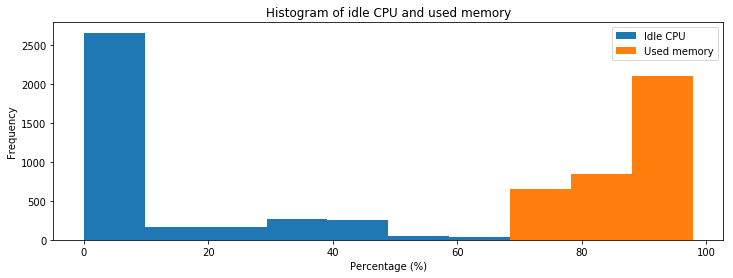

In [9]:
hist = series.plot.hist(title = 'Histogram of idle CPU and used memory')
hist.legend(['Idle CPU', 'Used memory'])
hist.set_xlabel("Percentage (%)")
fig = hist.get_figure()
plt.show()

In [10]:
plt.close(fig)

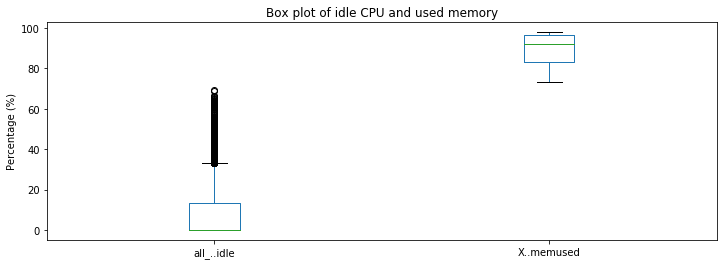

In [11]:
bp = series.plot.box(title = 'Box plot of idle CPU and used memory')
bp.set_ylabel("Percentage (%)")
fig = bp.get_figure()
plt.show()

In [12]:
plt.close(fig)

In [13]:
# Task II - Estimating Service Metrics from Device Statistics
def nmae(y_test, y_pred):
    y_test = pd.DataFrame(y_test)
    y_pred = pd.DataFrame(y_pred)
    
    sum = 0.0
    m = len(y_test)
    average = np.mean(y_test)
    
    for i in range(m):
        sum += abs(y_test.iloc[i, 0] - y_pred.iloc[i, 0])
        i += 1
        
    nmae = (sum / m) / average
    return nmae

In [14]:
# 1. Evaluate the Accuracy of Service Metric Estimation
# (a) Model Training - use linear regression to train a model M
# with the training set. Provide the coefficients of your model M.
X = X.iloc[:, X.columns != 'TimeStamp']
Y = Y.iloc[:, Y.columns != 'TimeStamp']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print 'Coefficients:', lm.coef_

Coefficients: [[ -8.63879476e-02  -7.72699183e-02  -1.33623558e-02  -9.87963259e-05
   -3.54053585e-03   2.15181648e-05  -5.89256394e-02  -5.60887870e-02
   -1.58745163e-05]]


In [15]:
# (b) Accuracy of Model M - compute the estimation error of M over the test set.
# Explained variance score: 1 is perfect prediction
print 'Accuracy score: %.4f' % model.score(X_test, y_test)
print 'Normalized Mean Absolute Error: %0.4f ' % nmae(y_test, y_pred)

Accuracy score: 0.7282
Normalized Mean Absolute Error: 0.1012 


In [16]:
plt.clf()

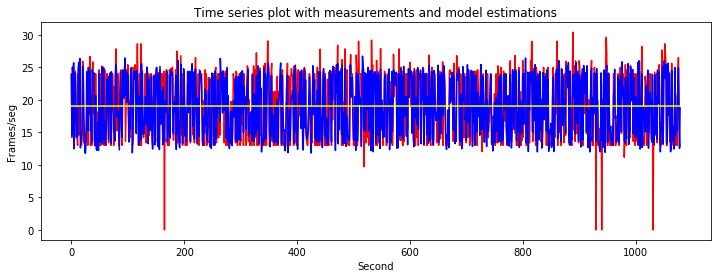

In [17]:
# (c) Produce a time series plot that shows both the measurements and
# the model estimations for M for the Video Frame Rate values in the
# test set (see example of such a plot in Figure 4(a) of [1]).
# Show also the prediction of the a naive method.
interval = np.arange(0, 1080, 1)

naive_pred = [np.mean(y_test) for i in range(len(y_test))]
naive_pred = pd.DataFrame(naive_pred)

plt.plot(interval, y_test, 'red', interval, y_pred, 'blue', interval, naive_pred, 'yellow')
plt.title('Time series plot with measurements and model estimations')
plt.ylabel('Frames/seg')
plt.xlabel('Second')
plt.show()

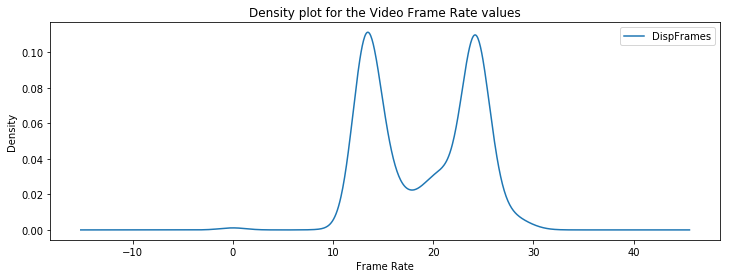

In [18]:
# (d) Produce a density plot and a histogram for the Video Frame Rate values
# in the test set. Set the bin size of the histogram to 1 frame.
kde = y_test.plot.kde(title = 'Density plot for the Video Frame Rate values')
kde.set_xlabel("Frame Rate")
fig = kde.get_figure()
plt.show()

In [19]:
plt.close(fig)

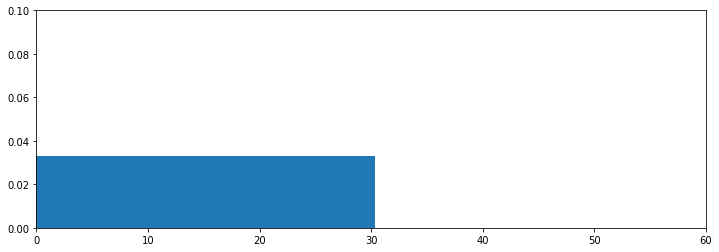

In [20]:
plt.hist(y_test.DispFrames, bins=1, normed=1)
plt.axis([0, 60, 0, 0.1])
fig = hist.get_figure()
plt.show()

In [21]:
plt.close(fig)

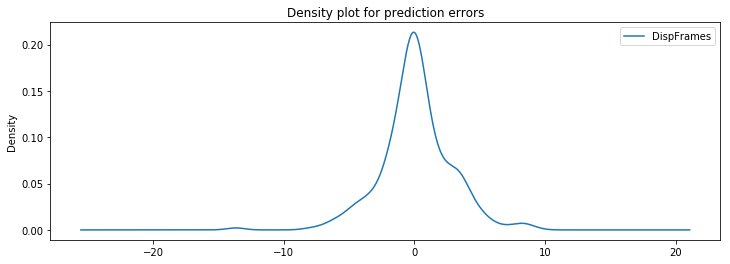

In [22]:
# (e) Produce a density plot for the prediction errors in the test set.
dy = pd.DataFrame(y_test)

residuals = [dy.iloc[i] - y_pred[i] for i in range(len(y_pred))]
residuals = pd.DataFrame(residuals)

kde = residuals.plot.kde(title = 'Density plot for prediction errors')
fig = kde.get_figure()
plt.show()

In [23]:
# (f) Based on the above figures and graphs, discuss the accuracy of
# estimating the Video Frame Rate.

# Considering the figures and graphs above, especially the time series plot,
# it's noticeable that estimates are not so accurate but generally close to
# the real frame rate. On the other hand, the deviation is usually high when
# a frame rate drop happens.

In [24]:
plt.close(fig)
plt.clf()

In [25]:
# 2. Study the Relationship between Estimation Accuracy and the Size of
# the Training Set (a) From the above training set with 2520 observations,
# create six training sets by selecting uniformly at random 50, 100, 200,
# 500, 1000, and 2520 observations (which is the original set).
# (b) Train a linear model and compute the NMAE for each model for the
# original test set with 1080 observations. (c) Perform the above 50 times,
# so you train models for 50 different subsets of a given size.

NMAE = {}
group_sizes = [2520, 1000, 500, 200, 100, 50]
rounds = 50
    
for size in group_sizes:
    group_results = []

    for i in range(rounds):
        if(size == 2520):
            gX_train = X_train
            gy_train = y_train
        else:
            gX_train, gX_test, gy_train, gy_test = train_test_split(X_train, y_train, train_size=size, test_size=0)
        
        lm = linear_model.LinearRegression()
        model = lm.fit(gX_train, gy_train)
        y_pred = lm.predict(X_test)
        
        res = nmae(y_test, y_pred)
        group_results.append([i, res])
    
    NMAE[size] = np.array(group_results)

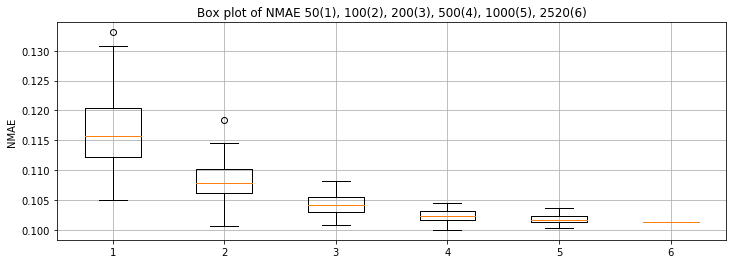

In [26]:
# (d) Produce a plot that shows NMAE for M against the size of
# the training set. Use error bars or box plots to show the
# range of the NMAE values for a given set size.

data = [NMAE[50][:,1], NMAE[100][:,1], NMAE[200][:,1], NMAE[500][:,1], NMAE[1000][:,1], NMAE[2520][:,1]]

plt.title('Box plot of NMAE 50(1), 100(2), 200(3), 500(4), 1000(5), 2520(6)')
plt.ylabel('NMAE');
plt.grid(True)
plt.boxplot(data)
plt.show()

In [27]:
# (e) Based on the above, discuss the relationship between the accuracy
# of the model estimations and the training set.

# Estimations are more accurate when the amount of observations in
# a training set is closer to the total amount of observations.